<a href="https://colab.research.google.com/github/vitor-marinho-fjp/balana_comercial_amz/blob/main/balanca_comercial_amz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

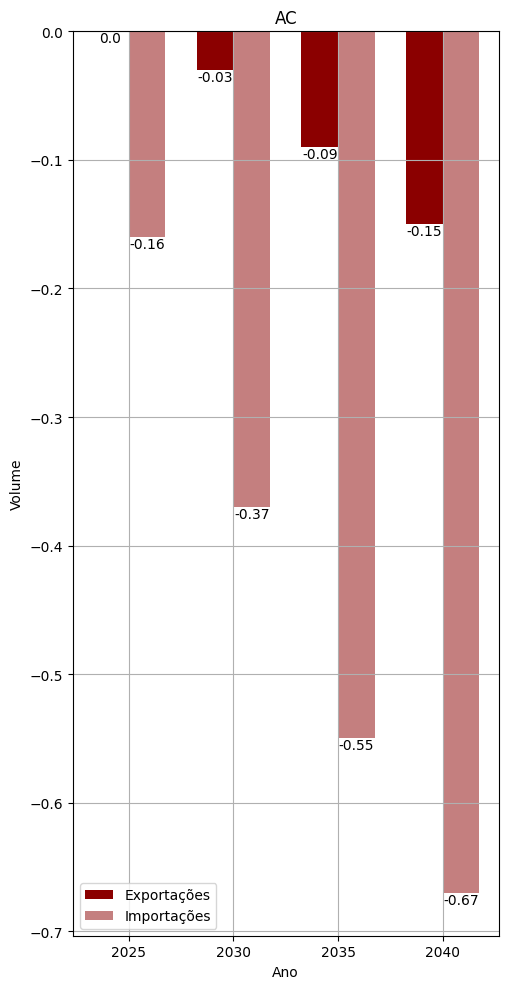

In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd

# Dados de exemplo para exportações e importações de estados em determinados anos
new_data = {
    "Ano": [2025, 2025, 2030, 2030, 2035, 2035, 2040, 2040],
    "variável": ["4 ExpVol", "5 ImpVolUsed", "4 ExpVol", "5 ImpVolUsed", "4 ExpVol", "5 ImpVolUsed", "4 ExpVol", "5 ImpVolUsed"],
    # Dados fictícios para cada estado
    "AC": [0, 0.16, -0.03, 0.37, -0.09, 0.55, -0.15, 0.67],
    # Continua com dados para outros estados...
}

# Convertendo os dados em um DataFrame
df_new = pd.DataFrame(new_data)

# Separando os dados em dois DataFrames para Exportações e Importações
df_expvol_new = df_new[df_new['variável'] == '4 ExpVol'].drop('variável', axis=1).set_index('Ano')
df_impvolused_new = df_new[df_new['variável'] == '5 ImpVolUsed'].drop('variável', axis=1).set_index('Ano')

# Configuração das cores para cada estado
colors = ['darkred', 'darkblue', 'darkgreen', 'darkgray', 'darkorange', 'darkviolet', 'darkcyan'] * (len(df_expvol_new.columns) // 7 + 1)

# Configuração da largura da barra e índice para os grupos de barras
bar_width = 0.35
index = np.arange(len(df_expvol_new.index))

# Recalculando o layout da grade para acomodar todos os estados
num_rows = (len(df_expvol_new.columns) + 2) // 3
gs = gridspec.GridSpec(num_rows, 3)

# Criando um gráfico para cada estado na grade ajustada
plt.figure(figsize=(14, 10))

# Loop para criar gráficos de barras para cada estado
for i, state in enumerate(df_expvol_new.columns):
    ax = plt.subplot(gs[i // 3, i % 3])

    # Barras de Exportação
    exp_bars = ax.bar(index - bar_width/2, df_expvol_new[state], bar_width, label="Exportações", color=colors[i])
    # Barras de Importação
    imp_bars = ax.bar(index + bar_width/2, -df_impvolused_new[state], bar_width, label="Importações", color=colors[i], alpha=0.5)

    # Adicionando valores nas barras
    for bar in exp_bars + imp_bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom' if yval > 0 else 'top', ha='center')

    ax.set_xlabel('Ano')
    ax.set_ylabel('Volume')
    ax.set_title(state)
    ax.set_xticks(index)
    ax.set_xticklabels(df_expvol_new.index)
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.savefig('balanca_comercial.png', dpi=300, transparent=True)
plt.show()
